# Unweight and augment samples

Johann Brehmer, Kyle Cranmer, Marco Farina, Felix Kling, Duccio Pappadopulo, Josh Ruderman 2018

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import logging
import os

from madminer.sampling import SampleAugmenter
from madminer.sampling import multiple_benchmark_thetas
from madminer.sampling import constant_morphing_theta, multiple_morphing_thetas, random_morphing_thetas

logging.basicConfig(format='%(asctime)s  %(message)s', datefmt='%H:%M')


In [2]:
base_dir = '/Users/johannbrehmer/work/projects/madminer/diboson_mining/'
mg_dir = '/Users/johannbrehmer/work/projects/madminer/MG5_aMC_v2_6_2/'

In [3]:
sample_dir = base_dir + 'data/samples/wgamma/'
card_dir = base_dir + 'cards/wgamma/'
ufo_model_dir = card_dir + 'SMWgamma_UFO'
run_card_dir = card_dir + 'run_cards/'
mg_process_dir = base_dir + 'data/mg_processes/wgamma/'
log_dir = base_dir + 'logs/wgamma/'
temp_dir = base_dir + 'data/temp'
delphes_dir = mg_dir + 'Delphes'

## Load data (with tight cuts)

In [4]:
sa = SampleAugmenter(sample_dir + 'samples_tight.h5', debug=False)

14:04  
14:04  ------------------------------------------------------------
14:04  |                                                          |
14:04  |  MadMiner v0.1.1                                         |
14:04  |                                                          |
14:04  |           Johann Brehmer, Kyle Cranmer, and Felix Kling  |
14:04  |                                                          |
14:04  ------------------------------------------------------------
14:04  
14:04  Loading data from /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/samples/wgamma/samples_tight.h5
14:04  Found 2 parameters:
14:04     cWWW (LHA: dim6 1, maximal power in squared ME: (2,), range: (-0.02, 0.02))
14:04     cWWWtilde (LHA: dim6 2, maximal power in squared ME: (2,), range: (-0.02, 0.02))
14:04  Found 6 benchmarks:
14:04     sm: cWWW = 0.00e+00, cWWWtilde = 0.00e+00
14:04     morphing_basis_vector_1: cWWW = -6.07e-03, cWWWtilde = -1.84e-02
14:04     morphing_basis_vect

### SALLY training data

In [5]:
for i in range(10):
    _, _, _ = sa.extract_samples_train_local(
        theta=constant_morphing_theta([0.,0.]),
        n_samples=1000000,
        folder=sample_dir + 'train_local_tight',
        filename='train_' + str(i)
    )

14:05  Extracting training sample for local score regression. Sampling and score evaluation according to ('theta', array([0., 0.]))
14:05  Effective number of samples: 98.24521715679928
14:05  Extracting training sample for local score regression. Sampling and score evaluation according to ('theta', array([0., 0.]))
14:05  Effective number of samples: 98.24521715679928
14:05  Extracting training sample for local score regression. Sampling and score evaluation according to ('theta', array([0., 0.]))
14:05  Effective number of samples: 98.24521715679928
14:05  Extracting training sample for local score regression. Sampling and score evaluation according to ('theta', array([0., 0.]))
14:05  Effective number of samples: 98.24521715679928
14:05  Extracting training sample for local score regression. Sampling and score evaluation according to ('theta', array([0., 0.]))
14:05  Effective number of samples: 98.24521715679928
14:05  Extracting training sample for local score regression. Sampling

### RASCAL training data

In [ ]:
for i in range(1):
    _ = sa.extract_samples_train_ratio(
        theta0=random_morphing_thetas(1000, [('gaussian', 0., 0.005), ('gaussian', 0., 0.005)]),
        theta1=constant_morphing_theta([0.,0.]),
        n_samples=100000,
        folder=sample_dir + 'train_ratio_tight',
        filename='train_' + str(i)
    )

### SCANDAL training data

In [ ]:
for i in range(1):
    sa.extract_samples_train_global(
        theta=random_morphing_thetas(10000, [('gaussian', 0., 0.005), ('gaussian', 0., 0.005)]),
        n_samples=100000,
        folder=sample_dir + 'train_scandal_tight',
        filename='train_' + str(i)
    )

### Validation and test data

In [6]:
_, _ = sa.extract_samples_train_plain(
    theta=constant_morphing_theta([0.,0.]),
    n_samples=1000000,
    folder=sample_dir + 'validation_tight',
    filename='validation'
)

14:05  Extracting plain training sample. Sampling according to ('theta', array([0., 0.]))
14:05  Effective number of samples: 98.24521715679928


In [7]:
x_sm, _ = sa.extract_samples_test(
    theta=constant_morphing_theta([0.,0.]),
    n_samples=1000000,
    folder=sample_dir + 'test_tight',
    filename='test'
)

14:05  Extracting evaluation sample. Sampling according to ('theta', array([0., 0.]))
14:05  Effective number of samples: 97.77947487372965


### xsec test

In [8]:
thetas_benchmarks, xsecs_benchmarks, xsec_errors_benchmarks = sa.extract_cross_sections(
    theta=multiple_benchmark_thetas(['sm', 'morphing_basis_vector_1', 'morphing_basis_vector_2', 'morphing_basis_vector_3', 'morphing_basis_vector_4', 'morphing_basis_vector_5'])
)

thetas_morphing, xsecs_morphing, xsec_errors_morphing = sa.extract_cross_sections(
    theta=random_morphing_thetas(1000, [('gaussian', 0., 0.02), ('gaussian', 0., 0.02)])
)

14:05  Starting cross-section calculation
14:05  Starting cross-section calculation


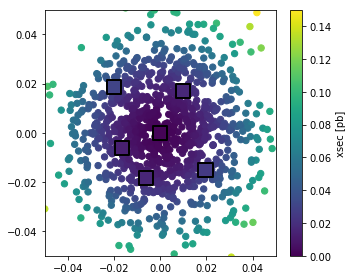

In [9]:
cmin, cmax = 0., 0.15

fig = plt.figure(figsize=(5,4))

sc = plt.scatter(thetas_morphing[:,0], thetas_morphing[:,1], c=xsecs_morphing,
            s=40., cmap='viridis', vmin=cmin, vmax=cmax,
            marker='o')

plt.scatter(thetas_benchmarks[:,0], thetas_benchmarks[:,1], c=xsecs_benchmarks,
            s=200., cmap='viridis', vmin=cmin, vmax=cmax,lw=2., edgecolor='black',
            marker='s')

cb = plt.colorbar(sc)
cb.set_label('xsec [pb]')

plt.xlim(-0.05,.05)
plt.ylim(-0.05,.05)
plt.tight_layout()
plt.show()

### Observable distributions

In [16]:
x_bsm1, _ = sa.extract_samples_test(
    theta=constant_morphing_theta([0.008,0.]),
    n_samples=1000000,
    folder=None,
    filename=None
)

x_bsm2, _ = sa.extract_samples_test(
    theta=constant_morphing_theta([0.,0.008]),
    n_samples=1000000,
    folder=None,
    filename=None
)

14:08  Extracting evaluation sample. Sampling according to ('theta', array([0.008, 0.   ]))
14:08  Effective number of samples: 64.72956101584782
14:08  Extracting evaluation sample. Sampling according to ('theta', array([0.   , 0.008]))
14:08  Effective number of samples: 64.92844271147419


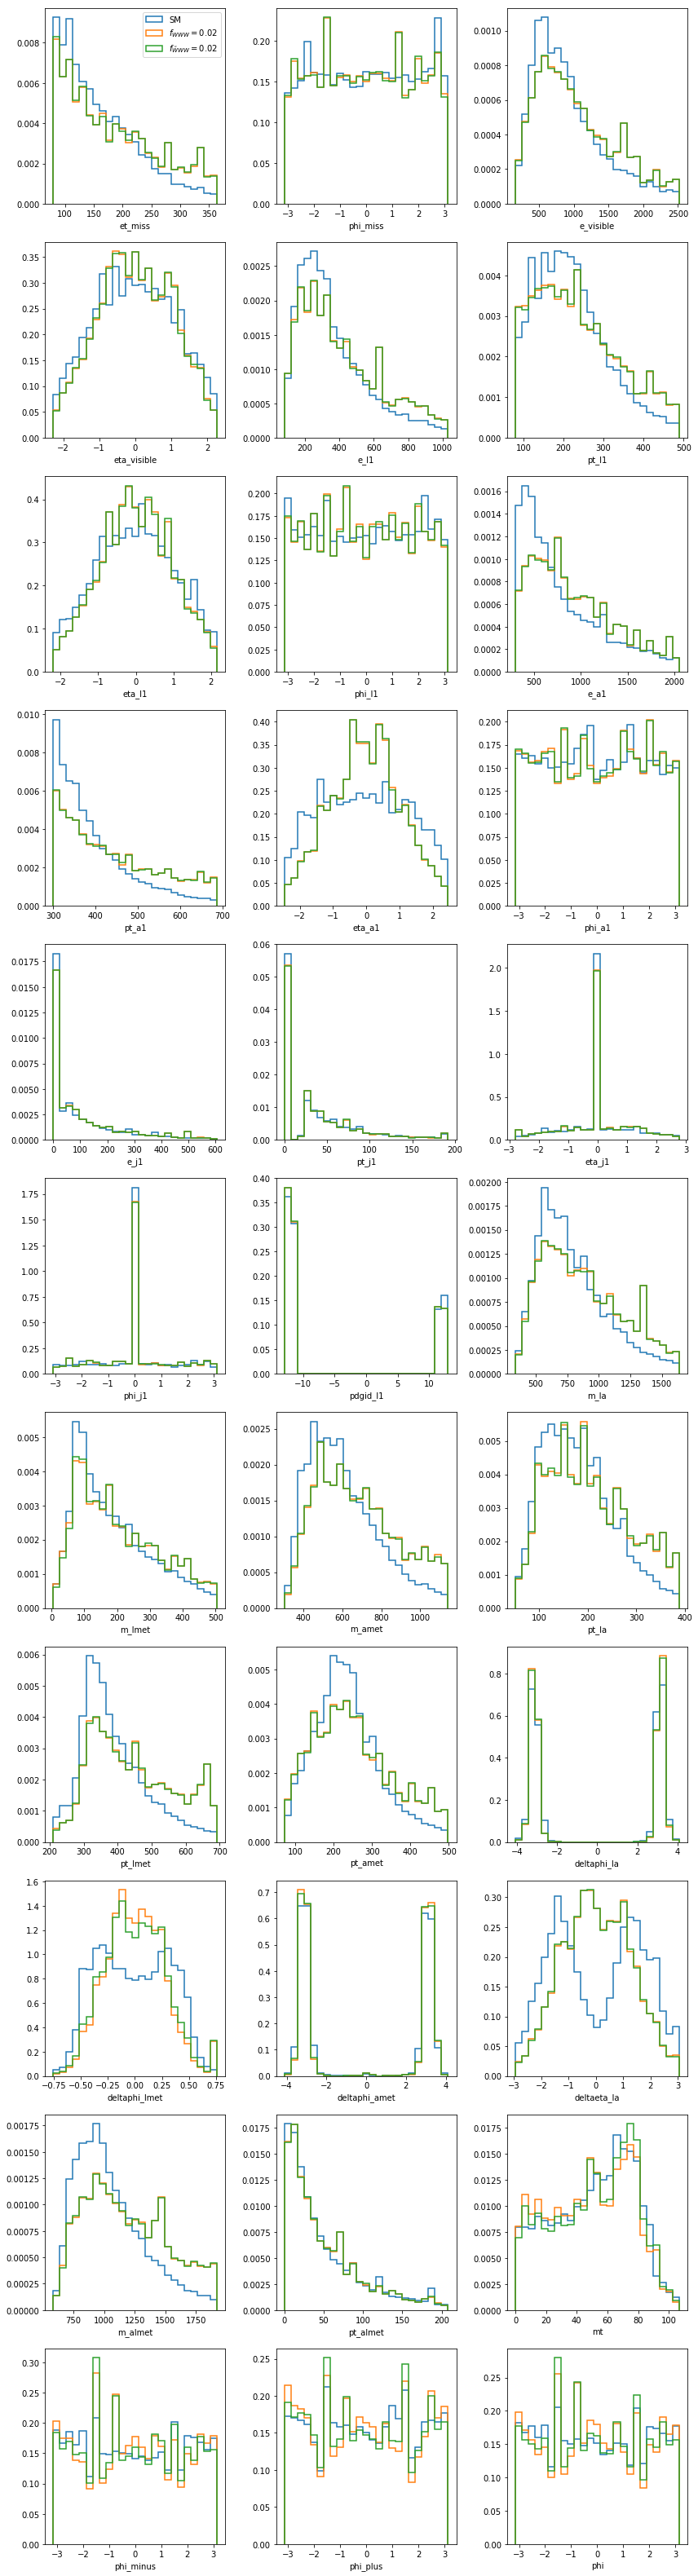

In [17]:
bins = 25
n_observables = x_sm.shape[1]
n_cols = 3
n_rows = (n_observables + n_cols - 1) // n_cols
labels = sa.observables.keys()

plt.figure(figsize=(4. * n_cols, 4. * n_rows))

for i, label in enumerate(labels):
    xmin = np.percentile(x_sm[:,i], 5.)
    xmax = np.percentile(x_sm[:,i], 95.)
    xwidth = xmax - xmin
    xmin -= xwidth * 0.1
    xmax += xwidth * 0.1
    xmin = max(xmin, np.min(x_sm[:,i]))
    xmax = min(xmax, np.max(x_sm[:,i]))
    x_range = (xmin, xmax)
    
    ax = plt.subplot(n_rows, n_cols, i+1)
       
    plt.hist(x_sm[:,i], histtype='step', range=x_range, bins=bins, lw=1.5, label=r'SM', density=True) 
    plt.hist(x_bsm1[:,i], histtype='step', range=x_range, bins=bins, lw=1.5, label=r'$f_{WWW} = 0.02$', density=True)
    plt.hist(x_bsm2[:,i], histtype='step', range=x_range, bins=bins, lw=1.5, label=r'$f_{\tilde{W}WW} = 0.02$', density=True) 
    
    if i == 0:
        plt.legend()
        
    plt.xlabel(label)
    
plt.tight_layout()
plt.savefig('../../figures/wgamma/observables.pdf')

## Same without cuts

In [12]:
sa_all = SampleAugmenter(sample_dir + 'samples.h5', debug=False)

14:07  Loading data from /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/samples/wgamma/samples.h5
14:07  Found 2 parameters:
14:07     cWWW (LHA: dim6 1, maximal power in squared ME: (2,), range: (-0.02, 0.02))
14:07     cWWWtilde (LHA: dim6 2, maximal power in squared ME: (2,), range: (-0.02, 0.02))
14:07  Found 6 benchmarks:
14:07     sm: cWWW = 0.00e+00, cWWWtilde = 0.00e+00
14:07     morphing_basis_vector_1: cWWW = -6.07e-03, cWWWtilde = -1.84e-02
14:07     morphing_basis_vector_2: cWWW = 1.00e-02, cWWWtilde = 1.70e-02
14:07     morphing_basis_vector_3: cWWW = -1.99e-02, cWWWtilde = 1.87e-02
14:07     morphing_basis_vector_4: cWWW = 1.97e-02, cWWWtilde = -1.53e-02
14:07     morphing_basis_vector_5: cWWW = -1.65e-02, cWWWtilde = -6.33e-03
14:07  Found 33 observables: et_miss, phi_miss, e_visible, eta_visible, e_l1, pt_l1, eta_l1, phi_l1, e_a1, pt_a1, eta_a1, phi_a1, e_j1, pt_j1, eta_j1, phi_j1, pdgid_l1, m_la, m_lmet, m_amet, pt_la, pt_lmet, pt_amet, deltaphi_la, de

### SALLY training data

In [13]:
for i in range(10):
    _, _, _ = sa_all.extract_samples_train_local(
        theta=constant_morphing_theta([0.,0.]),
        n_samples=1000000,
        folder=sample_dir + 'train_local',
        filename='train_' + str(i)
    )

14:07  Extracting training sample for local score regression. Sampling and score evaluation according to ('theta', array([0., 0.]))
14:07  Effective number of samples: 6398.788896416895
14:07  Extracting training sample for local score regression. Sampling and score evaluation according to ('theta', array([0., 0.]))
14:07  Effective number of samples: 6398.788896416895
14:07  Extracting training sample for local score regression. Sampling and score evaluation according to ('theta', array([0., 0.]))
14:07  Effective number of samples: 6398.788896416895
14:07  Extracting training sample for local score regression. Sampling and score evaluation according to ('theta', array([0., 0.]))
14:07  Effective number of samples: 6398.788896416895
14:07  Extracting training sample for local score regression. Sampling and score evaluation according to ('theta', array([0., 0.]))
14:07  Effective number of samples: 6398.788896416895
14:07  Extracting training sample for local score regression. Sampling

### RASCAL training data

In [ ]:
for i in range(10):
    _ = sa_all.extract_samples_train_ratio(
        theta0=random_morphing_thetas(1000, [('gaussian', 0., 0.005), ('gaussian', 0., 0.005)]),
        theta1=constant_morphing_theta([0.,0.]),
        n_samples=100000,
        folder=sample_dir + 'train_ratio',
        filename='train_' + str(i)
    )

### SCANDAL training data

In [ ]:
for i in range(1):
    _, _, _ = sa_all.extract_samples_train_global(
        theta=random_morphing_thetas(10000, [('gaussian', 0., 0.005), ('gaussian', 0., 0.005)]),
        n_samples=100000,
        folder=sample_dir + 'train_scandal',
        filename='train_' + str(i)
    )

### Validation and test data

In [14]:
_, _ = sa_all.extract_samples_train_plain(
    theta=constant_morphing_theta([0.,0.]),
    n_samples=1000000,
    folder=sample_dir + 'validation',
    filename='validation'
)

14:07  Extracting plain training sample. Sampling according to ('theta', array([0., 0.]))
14:07  Effective number of samples: 6398.788896416895


In [15]:
_, _ = sa_all.extract_samples_test(
    theta=constant_morphing_theta([0.,0.]),
    n_samples=1000000,
    folder=sample_dir + 'test',
    filename='test'
)

14:07  Extracting evaluation sample. Sampling according to ('theta', array([0., 0.]))
14:07  Effective number of samples: 6527.274179817502
